# Trabajo Final

      Integrantes Grupo 8:
    
    - Renzo Mosquera (20181960)
    - Yenner Huancahuire (20173340)
    - Pamela Obregón (20173040)

## Regresiones Lineales

#### -> Librerias, Base de Datos y Estadísticas Descriptivas

In [62]:
# Importamos librerias necesarias

import pandas as pd
import numpy as np
import statsmodels.api as sm  # se especifica el modelo: y (vector), X (dataframe)
import statsmodels.formula.api as smf # se especifica el modelo como formula" y ~ x1 + x2 + x3"
from sklearn import datasets, linear_model # models 
from sklearn.metrics import mean_squared_error, r2_score
from linearmodels.iv import IV2SLS # for IV regression
import patsy  # matrix model de R
import warnings
import pyreadstat
import seaborn as sns
import re 
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from pystout import pystout
warnings.filterwarnings('ignore')

In [5]:
# Importamos la base de datos

datos = pd.read_stata(r"../../data/trabajo_final/replicacion/SerraPorterAEJ.dta")
datos

,anonid,took_fall,took_year,tookanother,numeconclass,econmajor,Major,Major_STEM,Major_Business,Major_Finance,...,ecojobs_b,ecojobs_c,ecojobs_d,ecojobs_e,ecojobs_f,ecojobs_g,ecojobs_h,major_current_a,major_current_b,survey_econmajor
0,4.0,0.0,0.0,0.0,0.0,0.0,Mathematics - BS,1.0,0.0,0.0,...,Entrepreneur,Journalist/ Correspondent,Working for marketplace on NPR,Business consultant,,,,Mathematics,,0.0
1,5.0,0.0,0.0,0.0,0.0,0.0,Biological Sciences - BS,1.0,0.0,0.0,...,Tax advisor,Managerial Position,,,,,,Biology,,0.0
2,7.0,1.0,1.0,1.0,13.0,1.0,Economics w/ Fina Appl - BS,0.0,0.0,0.0,...,,,,,,,,,,NaN
3,9.0,0.0,0.0,0.0,0.0,0.0,Journalism - BA,0.0,0.0,0.0,...,,,,,,,,Journalism,Communications,0.0
4,10.0,0.0,0.0,1.0,1.0,0.0,Markets & Culture - BA,0.0,0.0,0.0,...,Investment Banker,,,,,,,Markets and Culture,Economics,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,1386.0,0.0,0.0,0.0,0.0,0.0,Markets & Culture - BA,0.0,0.0,0.0,...,,,,,,,,,,NaN
623,1388.0,0.0,0.0,0.0,0.0,0.0,Economics w/ Fina Appl - PMJ,0.0,0.0,0.0,...,,,,,,,,Business,,0.0
624,1389.0,0.0,0.0,0.0,0.0,0.0,Accounting - BBA,0.0,1.0,0.0,...,Finance,Bank,Government,,,,,Economics,Public Relations,1.0
625,1393.0,0.0,1.0,1.0,10.0,1.0,Economics - BA,0.0,0.0,0.0,...,Professor,Economist,,,,,,Entrepreneurship,Finance Economics,0.0


In [6]:
# Observamos las variables

datos.columns

Index(['anonid', 'took_fall', 'took_year', 'tookanother', 'numeconclass',
       'econmajor', 'Major', 'Major_STEM', 'Major_Business', 'Major_Finance',
       'Major_Marketing', 'Major_SocSc', 'Major_Arts', 'Major_Comm',
       'Major_Hum', 'female', 'greek', 'econ_hs', 'varsity', 'class_fe',
       'class_fe2', 'yr_2016', 'treatment_class', 'treat2016', 'female_prof',
       'instate', 'freshman', 'american', 'ACumGPA', 'gradePrinciples',
       'small_class', 'grade3301', 'fem2016', 'femtreat16', 'female_treat',
       'Testscore3301', 'top', 'surveyed', 'ecojobs_a', 'ecojobs_b',
       'ecojobs_c', 'ecojobs_d', 'ecojobs_e', 'ecojobs_f', 'ecojobs_g',
       'ecojobs_h', 'major_current_a', 'major_current_b', 'survey_econmajor'],
      dtype='object')

In [7]:
# Seleccionamos las variables relevantes

variables = datos.loc[:,['american', 'instate', 'freshman', 'ACumGPA',
             'greek', 'econ_hs', 'varsity']]

variables

,american,instate,freshman,ACumGPA,greek,econ_hs,varsity
0,1.0,1.0,0.0,3.267,0.0,1.0,0.0
1,1.0,1.0,0.0,3.358,0.0,1.0,0.0
2,1.0,0.0,1.0,1.775,NaN,NaN,NaN
3,1.0,1.0,0.0,3.654,1.0,1.0,0.0
4,1.0,1.0,0.0,3.000,1.0,1.0,0.0
...,...,...,...,...,...,...,...
622,1.0,0.0,1.0,2.653,NaN,NaN,NaN
623,0.0,0.0,1.0,3.200,0.0,0.0,0.0
624,0.0,0.0,1.0,3.677,0.0,0.0,1.0
625,0.0,0.0,1.0,3.500,0.0,0.0,0.0


In [8]:
# Observamos las estadísticas descriptivas de las variables relevantes

variables.describe()

,american,instate,freshman,ACumGPA,greek,econ_hs,varsity
count,627.000000,627.000000,627.000000,627.000000,501.000000,501.000000,500.000000
mean,0.902711,0.221691,0.864434,3.432091,0.642715,0.578842,0.072000
std,0.296587,0.415717,0.342602,0.435175,0.479679,0.494239,0.258747
min,0.000000,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,3.229000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,3.500000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,3.740000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000


In [9]:
# Seleccionamos las estadísticas descriptivas de interés

tabla_summary = variables.describe().loc[["mean","std","count","min","max"]]
tabla_ed = tabla_summary.T
tabla_ed

,mean,std,count,min,max
american,0.902711,0.296587,627.0,0.0,1.0
instate,0.221691,0.415717,627.0,0.0,1.0
freshman,0.864434,0.342602,627.0,0.0,1.0
ACumGPA,3.432091,0.435175,627.0,1.2,4.0
greek,0.642715,0.479679,501.0,0.0,1.0
econ_hs,0.578842,0.494239,501.0,0.0,1.0
varsity,0.072000,0.258747,500.0,0.0,1.0


In [10]:
# Especificamos cada variable relevante

nombres = ["Estudiante americano","Estudiante in-state", "Estudiante de primer año",
          "GPA acumulado", "Estudiante que pertenece a una fraternidad o sororidad",
          "Estudiante que llevó Economía en High School", "Estudiante atleta"]

new_varnames = dict( zip( tabla_summary.columns, nombres) )

In [11]:
# Optimizamos la tabla de estadísticas descriptivas

new_ednames = {
    "mean": "Mean",
    "std": "Standard Deviation",
    "count": "Observations",
    "min": "Min",
    "max": "Max"}

tabla_ed.rename(index=new_varnames, columns=new_ednames, inplace=True)
tabla_ed

,Mean,Standard Deviation,Observations,Min,Max
Estudiante americano,0.902711,0.296587,627.0,0.0,1.0
Estudiante in-state,0.221691,0.415717,627.0,0.0,1.0
Estudiante de primer año,0.864434,0.342602,627.0,0.0,1.0
GPA acumulado,3.432091,0.435175,627.0,1.2,4.0
Estudiante que pertenece a una fraternidad o sororidad,0.642715,0.479679,501.0,0.0,1.0
Estudiante que llevó Economía en High School,0.578842,0.494239,501.0,0.0,1.0
Estudiante atleta,0.072000,0.258747,500.0,0.0,1.0


In [64]:
# Exportamos la tabla anterior en formato Latex

tabla_ed.style.format(subset="Mean", precision=2).format(subset="Standard Deviation", precision=2)\
.format(subset="Observations", precision=0)\
.to_latex(
    r"..\..\Trabajo_final\Grupo8\tabla_ed.tex",
caption="Descriptive Statistics",
    column_format = "lcccc")

# Se realizarán modificaciones de formato al exportar la tabla a Overleaf.

In [65]:
# Creamos el vector de variables de control para realizar las regresiones

controles = np.column_stack((datos['female_prof'], datos['instate'], 
                               datos['freshman'], datos['american'], 
                               datos['ACumGPA'], datos['gradePrinciples'],
                               datos['small_class']))


#### -> Regresiones Tabla 3

In [57]:
# Modelo 1 - Tabla 3

model1_tabla3 = "took_year ~ treatment_class+yr_2016+treat2016"
    
ols_model1_t3 = smf.ols(model1_tabla3, data=datos).fit(cov_type='cluster', cov_kwds={'groups': datos['class_fe2']})

print(ols_model1_t3.summary())

                            OLS Regression Results                            
Dep. Variable:              took_year   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     16.50
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           0.000220
Time:                        18:04:08   Log-Likelihood:                -211.88
No. Observations:                 627   AIC:                             431.8
Df Residuals:                     623   BIC:                             449.5
Df Model:                           3                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1474      0.014     

In [58]:
# Modelo 2 - Tabla 3

model2_tabla3 = "took_year ~ treatment_class+yr_2016+treat2016+controles"
    
ols_model2_t3 = smf.ols(model2_tabla3, data=datos).fit(cov_type='cluster', cov_kwds={'groups': datos['class_fe2']})

print(ols_model2_t3.summary())

                            OLS Regression Results                            
Dep. Variable:              took_year   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     12.67
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           0.000114
Time:                        18:04:19   Log-Likelihood:                -203.16
No. Observations:                 627   AIC:                             428.3
Df Residuals:                     616   BIC:                             477.2
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3720      0.099     

In [59]:
# Modelo 3 - Tabla 3

model3_tabla3 = "tookanother ~ treatment_class+yr_2016+treat2016"
    
ols_model3_t3 = smf.ols(model3_tabla3, data=datos).fit(cov_type='cluster', cov_kwds={'groups': datos['class_fe2']})

print(ols_model3_t3.summary())

                            OLS Regression Results                            
Dep. Variable:            tookanother   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     10.04
Date:                Thu, 13 Jul 2023   Prob (F-statistic):            0.00176
Time:                        18:04:30   Log-Likelihood:                -330.66
No. Observations:                 627   AIC:                             669.3
Df Residuals:                     623   BIC:                             687.1
Df Model:                           3                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2372      0.018     

In [60]:
# Modelo 4 - Tabla 3

model4_tabla3 = "tookanother ~ treatment_class+yr_2016+treat2016+controles"
    
ols_model4_t3 = smf.ols(model4_tabla3, data=datos).fit(cov_type='cluster', cov_kwds={'groups': datos['class_fe2']})

print(ols_model4_t3.summary())

                            OLS Regression Results                            
Dep. Variable:            tookanother   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     6.235
Date:                Thu, 13 Jul 2023   Prob (F-statistic):            0.00281
Time:                        18:04:39   Log-Likelihood:                -318.16
No. Observations:                 627   AIC:                             658.3
Df Residuals:                     616   BIC:                             707.2
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.8032      0.176     

In [56]:
# Agrupamos los resultados en una tabla
# (con los estadísticos solicitados: sd, coeficientes y grado de significancia)

# Creamos vector de variables exógenas

var_exo = ["treat2016", "yr_2016", "treatment_class"]

# Creamos las etiquetas

labels = ["Treatment class x 2016", "Year 2016", "Treatment class (in 2015)"]


labels_var_exo = dict(zip(var_exo,labels))
labels_var_exo

{'treat2016': 'Treatment class x 2016',
 'yr_2016': 'Year 2016',
 'treatment_class': 'Treatment class (in 2015)'}

In [67]:
# Optimizamos la tabla con el formato adecuado
# (Luego, en los archivos .tex exportados, se harán cambios para ajustar las tablas en el template del
# Research assistant report)

pystout(models = [ols_model1_t3,ols_model2_t3,ols_model3_t3,ols_model4_t3], 
        file=r"..\..\Trabajo_final\Grupo8\tabla_3_reg.tex", digits=3,
        endog_names=['Took Micro within year','Took Micro within year','Took another econ class','Took another econ class'],
        exogvars = var_exo ,  # Regresores o variables exógenas 
        varlabels = labels_var_exo,  # Etiquetas de variables exógenas
        modstat={'nobs':'Observartions'}, # Número de observaciones 
        addrows={'Controls':['No','Yes','No','Yes']}, # fila de controles según modelo 
        addnotes=['Notes:LPM regressions. We report wild bootstrap cluster p-values in parentheses and wild bootstrap cluster 95\
                percent confidence intervals in square brackets, generated using boottest command in Stata 14 (Roodman et al.\
                2019) for standard errors clustered at the class level (12 clusters). In columns 1 and 2, the dependent variable is a\
                dummy equal to one if the student took Intermediate Micro the year after the Principles class. In columns 3 and 4,\
                the dependent variable is a dummy equal to one if the student enrolled in another economics class at any time after\
                the Principles class (up to January 2019).',
                 '* Significantly different from zero at 90 percent confidence.',
                 '** Significantly different from zero at 95 percent confidence.',
                 '*** Significantly different from zero at 99 percent confidence.'],
        title='Table 3 - Treatment Effects on Intermediate Outcomes',
        stars={.1:'*',.05:'**',.01:'***'}
       )


#### -> Regresiones Tabla 4

In [68]:
# Modelo 1 - Tabla 4

model1_tabla4 = "numeconclass ~ treatment_class+yr_2016+treat2016"
    
ols_model1_t4 = smf.ols(model1_tabla4, data=datos).fit(cov_type='cluster', cov_kwds={'groups': datos['class_fe2']})

print(ols_model1_t4.summary())

                            OLS Regression Results                            
Dep. Variable:           numeconclass   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.964
Date:                Thu, 13 Jul 2023   Prob (F-statistic):             0.0385
Time:                        19:21:56   Log-Likelihood:                -1505.4
No. Observations:                 627   AIC:                             3019.
Df Residuals:                     623   BIC:                             3037.
Df Model:                           3                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.0256      0.112     

In [70]:
# Modelo 2 - Tabla 4

model2_tabla4 = "numeconclass ~ treatment_class+yr_2016+treat2016+controles"
    
ols_model2_t4 = smf.ols(model2_tabla4, data=datos).fit(cov_type='cluster', cov_kwds={'groups': datos['class_fe2']})

print(ols_model2_t4.summary())

                            OLS Regression Results                            
Dep. Variable:           numeconclass   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     30.57
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.37e-06
Time:                        19:24:23   Log-Likelihood:                -1486.6
No. Observations:                 627   AIC:                             2995.
Df Residuals:                     616   BIC:                             3044.
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.8037      1.266     

In [127]:
# Modelo 3 - Tabla 4

model3_tabla4 = "econmajor ~ treatment_class+yr_2016+treat2016"
    
ols_model3_t4 = smf.ols(model3_tabla4, data=datos).fit(cov_type='cluster', cov_kwds={'groups': datos['class_fe2']})

print(ols_model3_t4.summary())

                            OLS Regression Results                            
Dep. Variable:              econmajor   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.719
Date:                Fri, 14 Jul 2023   Prob (F-statistic):            0.00770
Time:                        01:56:23   Log-Likelihood:                -133.19
No. Observations:                 627   AIC:                             274.4
Df Residuals:                     623   BIC:                             292.1
Df Model:                           3                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1026      0.011     

In [73]:
# Modelo 4 - Tabla 4

model4_tabla4 = "econmajor ~ treatment_class+yr_2016+treat2016+controles"
    
ols_model4_t4 = smf.ols(model4_tabla4, data=datos).fit(cov_type='cluster', cov_kwds={'groups': datos['class_fe2']})

print(ols_model4_t4.summary())

                            OLS Regression Results                            
Dep. Variable:              econmajor   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     8.543
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           0.000714
Time:                        19:28:36   Log-Likelihood:                -118.28
No. Observations:                 627   AIC:                             258.6
Df Residuals:                     616   BIC:                             307.4
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5105      0.158     

In [75]:
# Optimizamos la tabla con el formato adecuado
# (Luego, en los archivos .tex exportados, se harán cambios para ajustar las tablas en el template del
# Research assistant report)

pystout(models = [ols_model1_t4,ols_model2_t4,ols_model3_t4,ols_model4_t4], 
        file=r"..\..\Trabajo_final\Grupo8\tabla_4_reg.tex", digits=3,
        endog_names=['Number of econ classes taken','Number of econ classes taken','Major in economics','Major in economics'],
        exogvars = var_exo ,  
        varlabels = labels_var_exo,  
        modstat={'nobs':'Observartions'}, 
        addrows={'Controls':['No','Yes','No','Yes']},  
        addnotes=['Notes:Columns 1–2, OLS regressions; columns 3–4, LPM regressions. We report wild bootstrap cluster p-\
                values in parentheses and wild bootstrap cluster 95 percent confidence intervals in square brackets, generated using\
                boottest command in Stata 14 (Roodman et al. 2019) for standard errors clustered at the class level (12 clusters).\
                In columns 1 and 2, the dependent variable is the number of economics classes taken after the Principles class. In\
                columns 3 and 4, the dependent variable is a dummy equal to one if the student majored in economics (or declared\
                the economics major, if the student has not graduated yet).',
                 '* Significantly different from zero at 90 percent confidence.',
                 '** Significantly different from zero at 95 percent confidence.',
                 '*** Significantly different from zero at 99 percent confidence.'],
        title='Table 4 - Treatment Effects on Final Outcomes',
        stars={.1:'*',.05:'**',.01:'***'}
       )


#### -> Regresiones Tabla 5

In [76]:
# Modelo 1 - Tabla 5

model1_tabla5 = "Major_STEM ~ treatment_class+yr_2016+treat2016+controles"
    
ols_model1_t5 = smf.ols(model1_tabla5, data=datos).fit(cov_type='cluster', cov_kwds={'groups': datos['class_fe2']})

print(ols_model1_t5.summary())

                            OLS Regression Results                            
Dep. Variable:             Major_STEM   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.932
Date:                Thu, 13 Jul 2023   Prob (F-statistic):            0.00179
Time:                        20:05:35   Log-Likelihood:                -159.54
No. Observations:                 627   AIC:                             341.1
Df Residuals:                     616   BIC:                             389.9
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2453      0.142     

In [77]:
# Modelo 2 - Tabla 5

model2_tabla5 = "Major_Business ~ treatment_class+yr_2016+treat2016+controles"
    
ols_model2_t5 = smf.ols(model2_tabla5, data=datos).fit(cov_type='cluster', cov_kwds={'groups': datos['class_fe2']})

print(ols_model2_t5.summary())

                            OLS Regression Results                            
Dep. Variable:         Major_Business   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     78.36
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           9.36e-09
Time:                        20:05:54   Log-Likelihood:                -319.96
No. Observations:                 627   AIC:                             661.9
Df Residuals:                     616   BIC:                             710.8
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1535      0.214     

In [78]:
# Modelo 3 - Tabla 5

model3_tabla5 = "Major_Finance ~ treatment_class+yr_2016+treat2016+controles"
    
ols_model3_t5 = smf.ols(model3_tabla5, data=datos).fit(cov_type='cluster', cov_kwds={'groups': datos['class_fe2']})

print(ols_model3_t5.summary())

                            OLS Regression Results                            
Dep. Variable:          Major_Finance   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     61.41
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           3.46e-08
Time:                        20:06:07   Log-Likelihood:                -224.50
No. Observations:                 627   AIC:                             471.0
Df Residuals:                     616   BIC:                             519.8
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.3188      0.149     

In [79]:
# Modelo 4 - Tabla 5

model4_tabla5 = "Major_Marketing ~ treatment_class+yr_2016+treat2016+controles"
    
ols_model4_t5 = smf.ols(model4_tabla5, data=datos).fit(cov_type='cluster', cov_kwds={'groups': datos['class_fe2']})

print(ols_model4_t5.summary())

                            OLS Regression Results                            
Dep. Variable:        Major_Marketing   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     305.1
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           5.81e-12
Time:                        20:06:23   Log-Likelihood:                -199.30
No. Observations:                 627   AIC:                             420.6
Df Residuals:                     616   BIC:                             469.5
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2548      0.093     

In [80]:
# Optimizamos la tabla con el formato adecuado
# (Luego, en los archivos .tex exportados, se harán cambios para ajustar las tablas en el template del
# Research assistant report)

pystout(models = [ols_model1_t5,ols_model2_t5,ols_model3_t5,ols_model4_t5], 
        file=r"..\..\Trabajo_final\Grupo8\tabla_5_reg.tex", digits=3,
        endog_names=['Number of econ classes taken','Number of econ classes taken','Major in economics','Major in economics'],
        exogvars = var_exo ,   
        varlabels = labels_var_exo,  
        modstat={'nobs':'Observartions'},  
        addrows={'Controls':['No','Yes','No','Yes']}, 
        addnotes=['Notes: LPM regressions. We report wild bootstrap cluster p-values in parentheses and wild bootstrap cluster 95 percent\
                confidence intervals in square brackets, generated using boottest command in Stata 14 (Roodman et al. 2019)\
                for standard errors clustered at the class level (12 clusters). Dependent variables: dummy equal to one if the student\
                majored in (i) STEM subjects, (ii) finance, (iii) business, or (iv) marketing.',
                 '* Significantly different from zero at 90 percent confidence.',
                 '** Significantly different from zero at 95 percent confidence.',
                 '*** Significantly different from zero at 99 percent confidence.'],
        title='Table 5 - Treatment Effects on Other High-Earning Majors',
        stars={.1:'*',.05:'**',.01:'***'}
       )


#### -> Regresiones Tabla 6

In [82]:
# Modelo 1 - Tabla 6

model1_tabla6 = "Major_SocSc ~ treatment_class+yr_2016+treat2016+controles"
    
ols_model1_t6 = smf.ols(model1_tabla6, data=datos).fit(cov_type='cluster', cov_kwds={'groups': datos['class_fe2']})

print(ols_model1_t6.summary())

                            OLS Regression Results                            
Dep. Variable:            Major_SocSc   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     1483.
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           9.97e-16
Time:                        20:22:10   Log-Likelihood:                -131.82
No. Observations:                 627   AIC:                             285.6
Df Residuals:                     616   BIC:                             334.5
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6238      0.156     

In [83]:
# Modelo 2 - Tabla 6

model2_tabla6 = "Major_Arts ~ treatment_class+yr_2016+treat2016+controles"
    
ols_model2_t6 = smf.ols(model2_tabla6, data=datos).fit(cov_type='cluster', cov_kwds={'groups': datos['class_fe2']})

print(ols_model2_t6.summary())

                            OLS Regression Results                            
Dep. Variable:             Major_Arts   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.253
Date:                Thu, 13 Jul 2023   Prob (F-statistic):            0.00566
Time:                        20:22:26   Log-Likelihood:                 48.480
No. Observations:                 627   AIC:                            -74.96
Df Residuals:                     616   BIC:                            -26.11
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0503      0.070     

In [84]:
# Modelo 3 - Tabla 6

model3_tabla6 = "Major_Comm ~ treatment_class+yr_2016+treat2016+controles"
    
ols_model3_t6 = smf.ols(model3_tabla6, data=datos).fit(cov_type='cluster', cov_kwds={'groups': datos['class_fe2']})

print(ols_model3_t6.summary())

                            OLS Regression Results                            
Dep. Variable:             Major_Comm   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     20.19
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.15e-05
Time:                        20:22:41   Log-Likelihood:                 31.395
No. Observations:                 627   AIC:                            -40.79
Df Residuals:                     616   BIC:                             8.060
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1463      0.073     

In [85]:
# Modelo 4 - Tabla 6

model4_tabla6 = "Major_Hum ~ treatment_class+yr_2016+treat2016+controles"
    
ols_model4_t6 = smf.ols(model4_tabla6, data=datos).fit(cov_type='cluster', cov_kwds={'groups': datos['class_fe2']})

print(ols_model4_t6.summary())

                            OLS Regression Results                            
Dep. Variable:              Major_Hum   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     18.66
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.71e-05
Time:                        20:23:48   Log-Likelihood:                -69.809
No. Observations:                 627   AIC:                             161.6
Df Residuals:                     616   BIC:                             210.5
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1404      0.115     

In [88]:
# Optimizamos la tabla con el formato adecuado
# (Luego, en los archivos .tex exportados, se harán cambios para ajustar las tablas en el template del
# Research assistant report)

pystout(models = [ols_model1_t6,ols_model2_t6,ols_model3_t6,ols_model4_t6], 
        file=r"..\..\Trabajo_final\Grupo8\tabla_6_reg.tex", digits=3,
        endog_names=['Number of econ classes taken','Number of econ classes taken','Major in economics','Major in economics'],
        exogvars = var_exo ,   
        varlabels = labels_var_exo,  
        modstat={'nobs':'Observartions'},  
        addrows={'Controls':['No','Yes','No','Yes']}, 
        addnotes=['Notes: LPM regressions. We report wild bootstrap cluster p-values in parentheses and wild bootstrap cluster 95 percent\
                confidence intervals in square brackets, generated using boottest command in Stata 14 (Roodman et al. 2019)\
                for standard errors clustered at the class level (12 clusters). Dependent variables: dummy equal to one if the student\
                majored in (i) social science (other than economics), (ii) arts, (iii) communication studies, or (iv) humanities.',
                 '* Significantly different from zero at 90 percent confidence.', 
                 '** Significantly different from zero at 95 percent confidence.',
                 '*** Significantly different from zero at 99 percent confidence.'],
        title='Table 6 - Treatment Effects on Low-Earning Majors',
        stars={.1:'*',.05:'**',.01:'***'}
       )


#### -> Coefplot Tabla 4

In [119]:
# Identificamos las tablas de resumen de todas las regresiones de la Tabla 4

sum_model1_t4 = ols_model1_t4.summary2().tables[1]
sum_model2_t4 = ols_model2_t4.summary2().tables[1]
sum_model3_t4 = ols_model3_t4.summary2().tables[1]
sum_model4_t4 = ols_model4_t4.summary2().tables[1]


In [120]:
# Ejemplo: con la primera regresión de la tabla 4

sum_model1_t4 = ols_model1_t4.summary2().tables[1]
sum_model1_t4

# Se observa que el coeficiente estimado para la variable "treat2016" se encuentra en la fila 3 y columna 0.
# Se observa que el intervalo de confianza para dicha variable se encuentra en la fila 3, y columnas 4 y 5.

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,1.025641,0.111581,9.191926,3.858698e-20,0.806947,1.244335
treatment_class,-0.129300,0.184649,-0.700246,4.837734e-01,-0.491204,0.232605
yr_2016,-0.172534,0.136918,-1.260121,2.076258e-01,-0.440889,0.095821
treat2016,0.691577,0.219834,3.145908,1.655720e-03,0.260711,1.122443


In [121]:
# Obtenemos las subtablas que contienen los coeficientes para la variable Treatment class x 2016 (treat2016)

model1_t4_coef = sum_model1_t4.iloc[3,0]
model2_t4_coef = sum_model2_t4.iloc[3,0]
model3_t4_coef = sum_model3_t4.iloc[3,0]
model4_t4_coef = sum_model4_t4.iloc[3,0]


In [122]:
# Obtenemos las subtablas que contienen los intervalos de confianza

model1_lower = sum_model1_t4.iloc[3,4]
model1_upper = sum_model1_t4.iloc[3,5]

model2_lower = sum_model2_t4.iloc[3,4]
model2_upper = sum_model2_t4.iloc[3,5]

model3_lower = sum_model3_t4.iloc[3,4]
model3_upper = sum_model3_t4.iloc[3,5]

model4_lower = sum_model4_t4.iloc[3,4]
model4_upper = sum_model4_t4.iloc[3,5]


In [134]:
# Creamos una tabla vacía

tabla = np.zeros((4,3))

# Rellenamos la tabla creada

tabla[0,0] = model1_t4_coef
tabla[0,1] = model1_lower
tabla[0,2] = model1_upper 

tabla[1,0] = model2_t4_coef
tabla[1,1] = model2_lower
tabla[1,2] = model2_upper 

tabla[2,0] = model3_t4_coef 
tabla[2,1] = model3_lower
tabla[2,2] = model3_upper

tabla[3,0] = model4_t4_coef 
tabla[3,1] = model4_lower
tabla[3,2] = model4_upper

# Creamos un dataframe con los coeficientes e intervalos de confianza para cada modelo

tabla_coefplot = pd.DataFrame( tabla, columns = [ "Estimate","Lower_bound" , "Upper_bound"])
tabla_coefplot.index = [ "Modelo 1 - OLS","Modelo 2 - OLS", "Modelo 3 - LPM", "Modelo 4 - LPM"]

tabla_coefplot.reset_index(inplace = True)
tabla_coefplot.rename(columns = {"index" : "Model"}, inplace = True)

tabla_coefplot.round(3)


,Model,Estimate,Lower_bound,Upper_bound
0,Modelo 1 - OLS,0.692,0.261,1.122
1,Modelo 2 - OLS,0.522,0.019,1.025
2,Modelo 3 - LPM,0.098,0.042,0.154
3,Modelo 4 - LPM,0.080,0.009,0.152


In [135]:
# Creamos el gráfico que muestre los coeficientes y los intervalos de confianza

# Eliminamos los bordes del gráfico

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

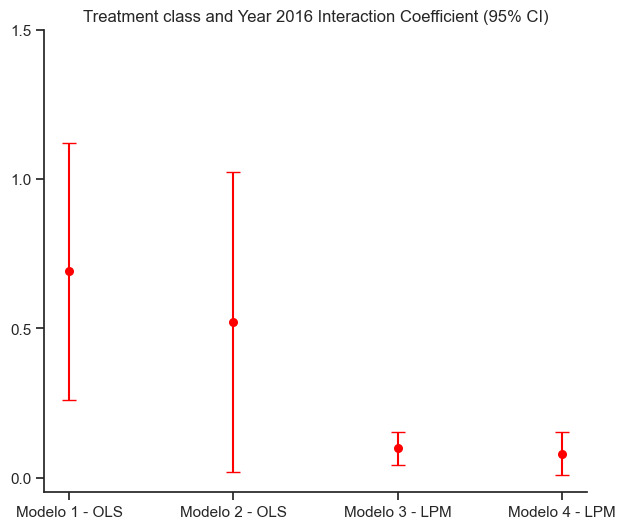

In [145]:
fig, ax = plt.subplots(figsize=(7, 6))

# Uso del scatter plot para el punto de valor del coeficiente

ax.scatter(x=tabla_coefplot['Model'], 
         marker='o', s=30, 
         y=tabla_coefplot['Estimate'], color = "red")

# Uso del errorbar para graficar el intervalo de confianza 

eb1 = plt.errorbar(x=tabla_coefplot['Model'], y=tabla_coefplot['Estimate'],
            yerr = 0.5*(tabla_coefplot['Upper_bound']- tabla_coefplot['Lower_bound']),
            color = 'red', ls='', capsize = 5)

ax.set_yticks([0,0.5,1,1.5])

# Título del gráfico
plt.title('Treatment class and Year 2016 Interaction Coefficient (95% CI)',fontsize=12)

fig.savefig('Gráfico_Treat2016.png', dpi=300)
